# CMU Portugal - Project 3 - Wine Quality <h3>December 2024</h3>

# Problem Statement

The goal of this analysis is to determine the quality of wine given a set of physicochemical input variables.

# Dataset - Wine Quality

The dataset is related to white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  These datasets can be viewed as classification or regression tasks.  

Per the authors of the dataset:  "The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods."

<table>
    <tr>
        <td>Dataset Characteristics: Multivariate</td>
        <td>Subject Area: Business </td>
    </tr>
    <tr>
        <td>Associated Tasks: Classification, Regression</td>
        <td>Feature Type: Real</td>
    </tr>
    <tr>
        <td>Instance Count: 4898</td>
        <td>Feature Count: 11</td>
    </tr>
</table>

Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol

Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

(<a href = "https://archive.ics.uci.edu/dataset/186/wine+quality">Link to data source</a>)

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns     

# Load and Preview Data

In [125]:
dataset_path = "dataset/winequality-white.csv"
df = pd.read_csv(dataset_path, delimiter=';')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

# Find and address null values

In [126]:
# Find nulls
# Nothing to address in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# Look for Outliers

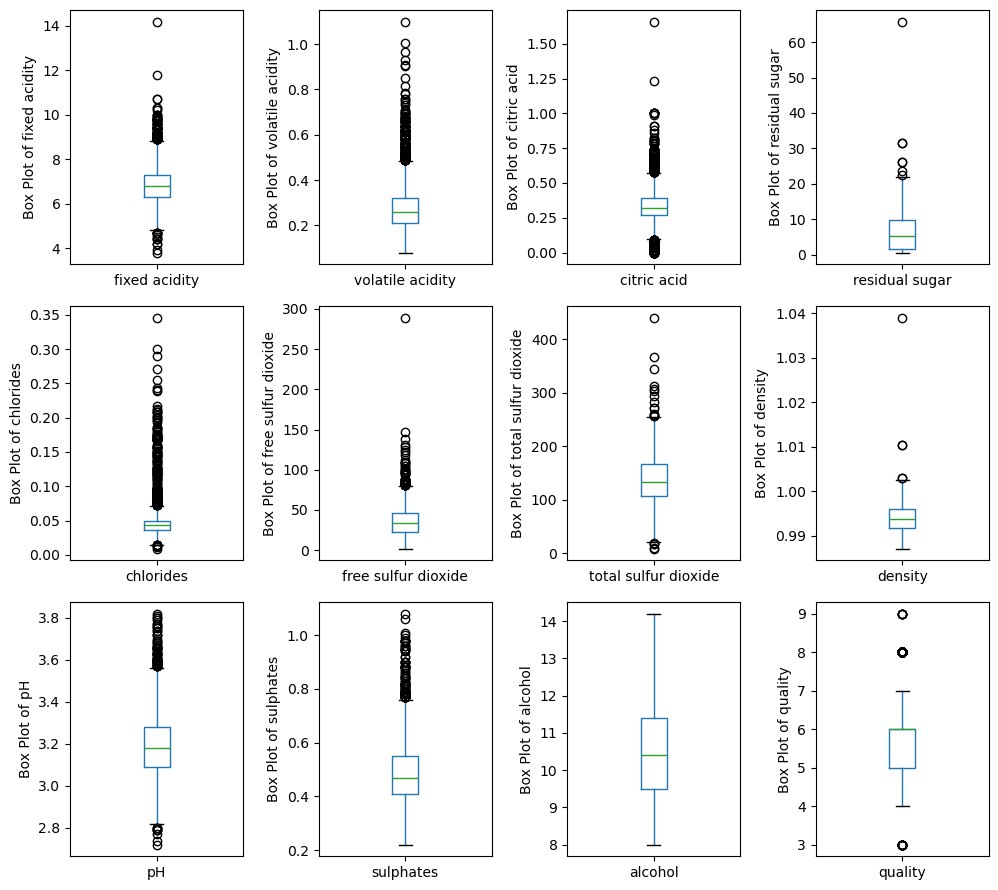

In [127]:
# Box plot to graphically show outlier analysis

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 9))

for x in range(len(df.columns.values)):
    plt.subplot(3,4,x+1) #attempting to print output in grid
    df.boxplot(column=df.columns.values[x], grid=False)
    plt.ylabel("Box Plot of " + df.columns.values[x])
    
plt.tight_layout()
plt.show()    

Analysis of Box Plots:
- Residual sugar, Free sulfur dioxide, and density have the most noticable outliers

Next Steps:
- TBD

# Evaluate Distributions

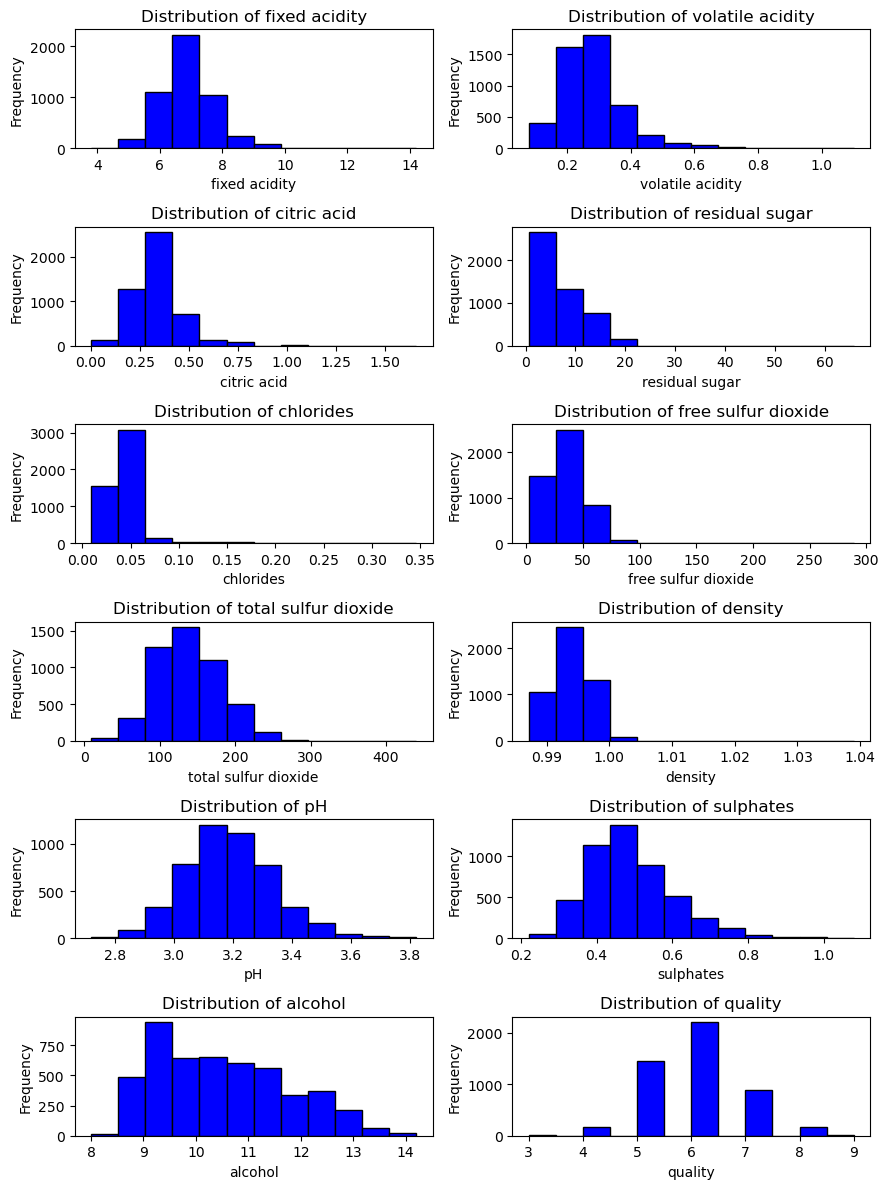

In [128]:
# Graph and evaluate histograms

plt.figure(figsize=(9, 12))

for x in range(len(df.columns.values)):
    #plt.figure(figsize=(4, 2))
    plt.subplot(6,2,x+1) #attempting to print output in grid
    df[df.columns.values[x]].plot(kind='hist', bins=12, color='blue', edgecolor='black')
    plt.title("Distribution of "+ df.columns.values[x])
    plt.xlabel(df.columns.values[x])
    plt.ylabel("Frequency")
    
plt.tight_layout()
plt.show()        


Analysis of histograms:
- A number of input variables are skewed, which may violate the assumptions of normality that underlie linear regression.  Because of this we should apply transformations to the skewed variables to improve regression results

- Our attributes have very different scales (e.g. 0.2-1.0 vs 0-400).  Because of this, we will want to do feature scaling to increase model accuracy and improve speed of convergence for optimization algorithms like gradient descent.

- The "Distribution of quality" histogram clearly shows that the classes are not balanced (i.e. there are not the same number of high quality wines as there are low qualtiy wines in the dataset).  Therefore, we must use "stratify = y" when we do the train/test split.

# Descriptive Statistics

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

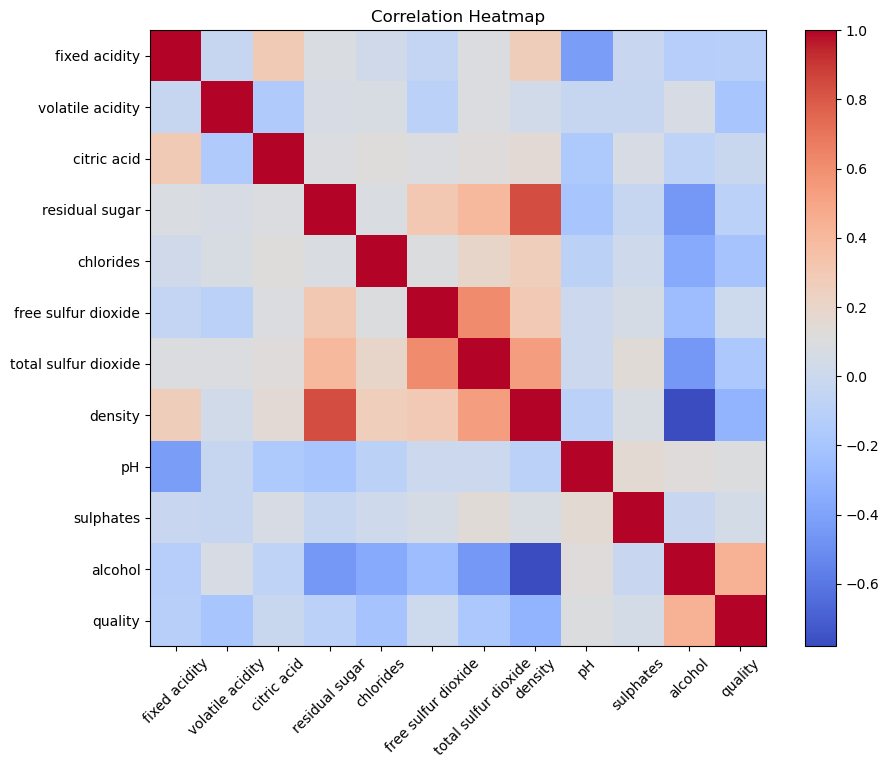

In [129]:
# Calculate coorelation between numeric variables 

plt.figure(figsize=(10, 8))
correlation = df.corr(numeric_only=True)
print(correlation)

plt.imshow(correlation, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation)), correlation.columns)
plt.title("Correlation Heatmap")
plt.show()

Analysis of correlation heatmap:
- Total Sulfur Dioxide and Free Sulfur dioxide are correlated (0.62)
- Density and residual sugar are highly positively coorelated (0.84)
- Density and Total sulfur dioxide are coorelated (0.53)
- pH and Fixed acidity are negatively coorelated (-0.43)
- Alcohol and residual sugar are negatively coorelated (-0.45)
- Alcohol and total sulfur dioxide are negatively coorelated (-0.45)
- Alcohol and density are highly negatively coorelated (-0.78)

Next steps: 
- Consider removing highly coorelated variables
- Consider priciple component analysis to determine which variables to include in regressions model



<Figure size 1200x1200 with 0 Axes>

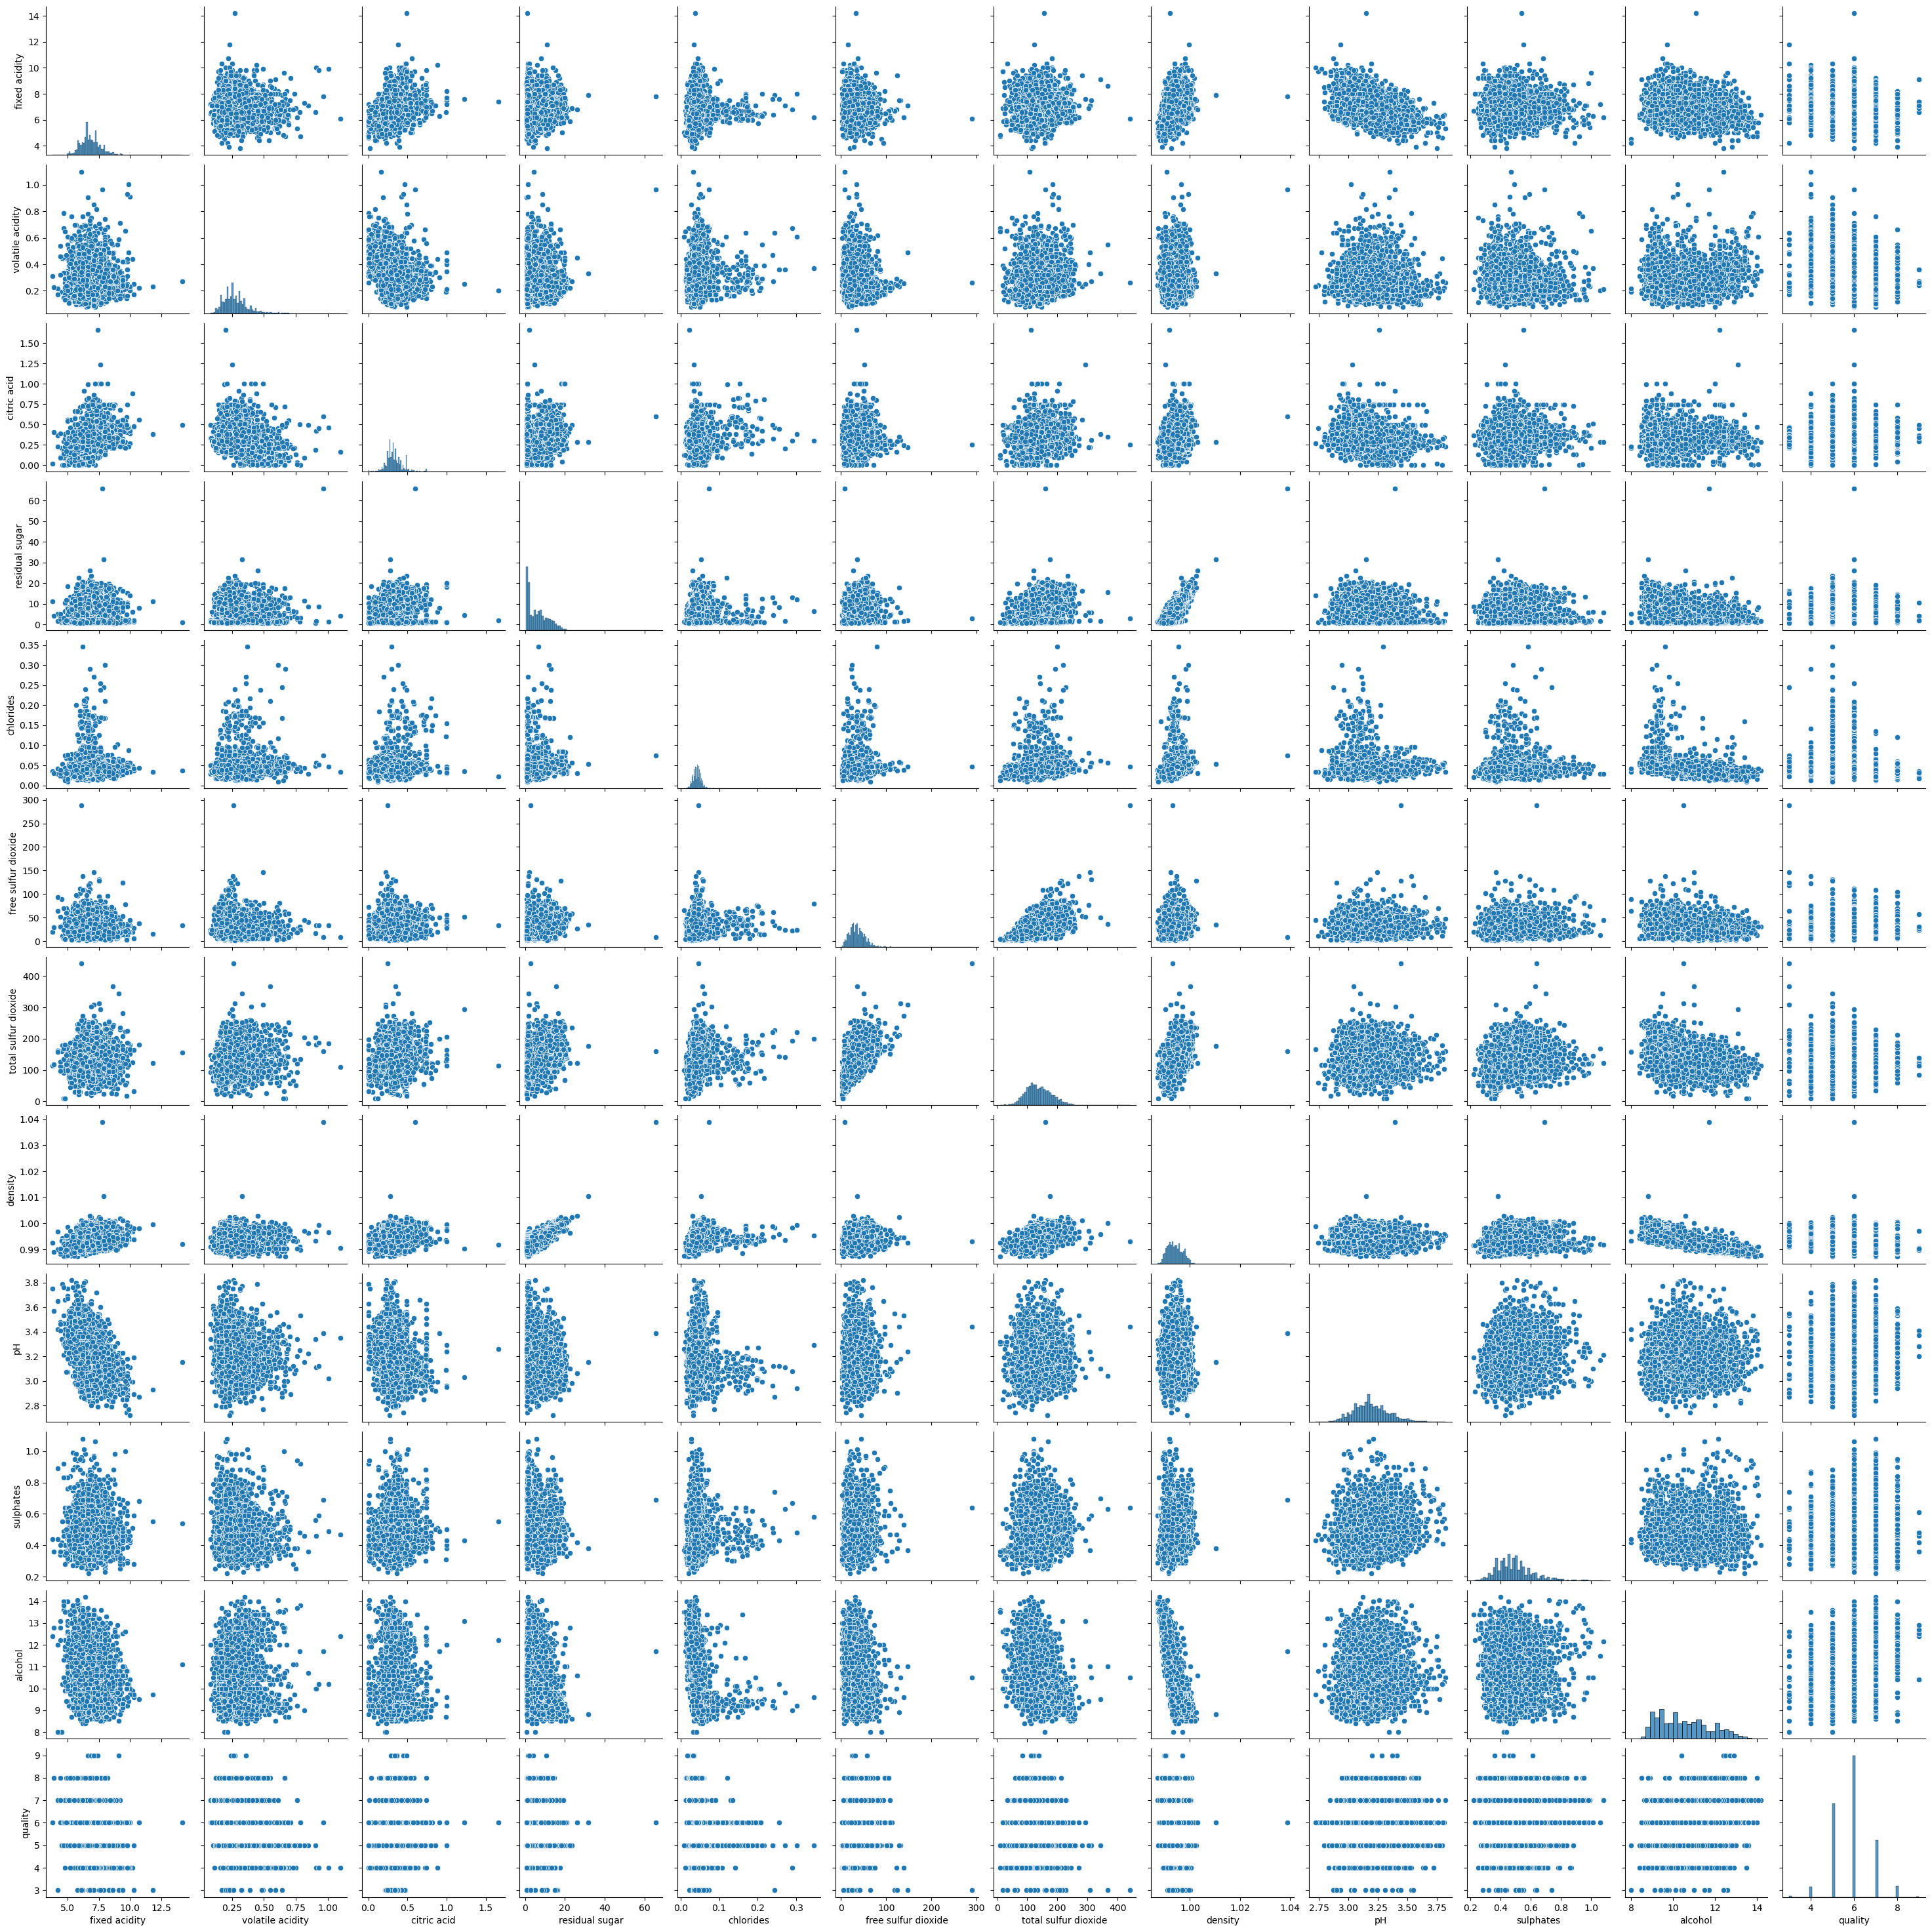

In [130]:
# Create pairplot to visualize relationship between all variables 

plt.figure(figsize=(12, 12))
sns.pairplot(df)

Analysis of PairPlot:
- Visual inspection of pairplot confirms results of correlation heatmap analysis

# Remove outliers

Outliers in density, residual sugar don't seem to be predictive of quality, will be removed

In [131]:
np.sum(df['residual sugar']>30)

3

In [132]:
df_clean = df.copy()
df_clean = df_clean[df_clean['density']<1.01]
df_clean = df_clean[df_clean['residual sugar']<30]

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4895 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4895 non-null   float64
 1   volatile acidity      4895 non-null   float64
 2   citric acid           4895 non-null   float64
 3   residual sugar        4895 non-null   float64
 4   chlorides             4895 non-null   float64
 5   free sulfur dioxide   4895 non-null   float64
 6   total sulfur dioxide  4895 non-null   float64
 7   density               4895 non-null   float64
 8   pH                    4895 non-null   float64
 9   sulphates             4895 non-null   float64
 10  alcohol               4895 non-null   float64
 11  quality               4895 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 497.1 KB


# Preprocessing the data

In [133]:
from sklearn.model_selection import train_test_split
target_column = 'quality'
X = df_clean.drop(target_column, axis=1)  # All columns except "target_col" as features
y = df_clean[target_column]


In [134]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

def visualize_model_result(models,X_test,y_test):
    if not isinstance(models, dict):
        models = {'': models}
        plt.figure(figsize=(6,6))
    else:
         plt.figure(figsize=(10, 9))
    
    # Display Results
    n_cols = np.ceil(np.sqrt(len(models))).astype(int)
    n_rows = np.round(np.sqrt(len(models))).astype(int)
    for i, (name, model) in enumerate(models.items(),start=1):
        y_pred = model.predict(X_test)
        print(f"{name} R Squared:")
        print(r2_score(y_test,y_pred))

        # Scatter plot
        plt.subplot(n_rows,n_cols,i)
        plt.scatter(y_test+np.random.uniform(-0.3, 0.3, size=np.size(y_test)), y_pred, color='blue', label='Predictions')
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Unity line')
        plt.xlabel("Wine Quality")
        plt.ylabel("Predicted Quality")
        plt.title(name)
    plt.tight_layout()
    plt.show()

    


In [135]:

all_features = X.columns.tolist()


numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

""" categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
]) """

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, all_features)#,
    #('cat', categorical_pipeline, categorical_features)
])
X_processed = preprocessor.fit_transform(X)
print(X_processed[:5])

[[ 1.72855347e-01 -8.05305331e-02  2.13594560e-01  2.88034585e+00
  -3.49518865e-02  5.69571679e-01  7.44941914e-01  2.40724890e+00
  -1.24661358e+00 -3.49288092e-01 -1.39378267e+00]
 [-6.56855161e-01  2.18481067e-01  4.82778755e-02 -9.58501641e-01
   1.48129424e-01 -1.25330035e+00 -1.49200850e-01 -3.97660450e-03
   7.40115931e-01  1.30712210e-03 -8.24800623e-01]
 [ 1.47668615e+00  1.91400003e-02  5.44227929e-01  1.06728291e-01
   1.93899751e-01 -3.12463174e-01 -9.72753396e-01  3.74930261e-01
   4.75218663e-01 -4.36936896e-01 -3.37101727e-01]
 [ 4.09915492e-01 -4.79212666e-01 -1.17038809e-01  4.28307139e-01
   5.60062371e-01  6.87176326e-01  1.12142308e+00  5.47160654e-01
   1.16484447e-02 -7.87532110e-01 -4.99668026e-01]
 [ 4.09915492e-01 -4.79212666e-01 -1.17038809e-01  4.28307139e-01
   5.60062371e-01  6.87176326e-01  1.12142308e+00  5.47160654e-01
   1.16484447e-02 -7.87532110e-01 -4.99668026e-01]]


In [136]:
#Make labels
label_encoder = LabelEncoder()
y_label =  label_encoder.fit_transform(y)
unique_values, counts = np.unique(y_label, return_counts=True)
print(unique_values)
print(counts)


[0 1 2 3 4 5 6]
[  20  163 1457 2195  880  175    5]


In [137]:
# Split in test and train
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, stratify=y,test_size=0.2, random_state=89)

# train models

In [138]:
## Lets Define a few algorithms (SVM, Decision Tree, Naive Bayes) that we want to test
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

models = {
  "Linear Regression": LinearRegression(),
  "Ridge": Ridge(),
  "Lasso": Lasso(alpha=0.0001),
  "MLPRegressor": MLPRegressor(max_iter=1000),
  "ElasticNet": ElasticNet(alpha=0.0001),
  "SVR_rbf": SVR(kernel='rbf',epsilon=0.25),
  "SVR_linear": SVR(kernel="linear",epsilon=0.25)
}


In [139]:
results = {}
for name, model in models.items():
    print(f"Fitting {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        #"classification_report": report,
        "model": model,
        "y_pred": y_pred,
        "r2": model.score(X_test,y_test)
    }



Fitting Linear Regression
Fitting Ridge
Fitting Lasso
Fitting MLPRegressor
Fitting ElasticNet
Fitting SVR_rbf
Fitting SVR_linear



Linear Regression:
R_squared: 0.28244824816428915

Ridge:
R_squared: 0.2825205799830469

Lasso:
R_squared: 0.2825262377634219

MLPRegressor:
R_squared: 0.4408648692899506

ElasticNet:
R_squared: 0.2825020357943887

SVR_rbf:
R_squared: 0.4173981493912158

SVR_linear:
R_squared: 0.2833555444963658


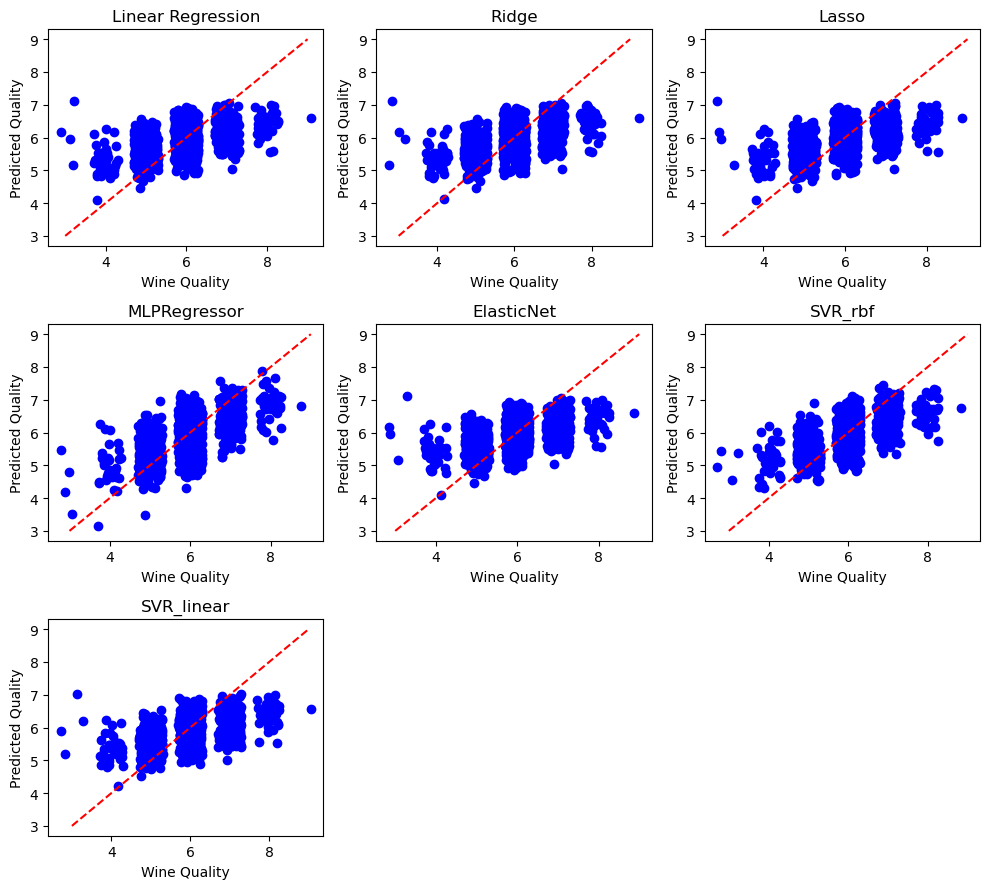

In [140]:

# Display Results
plt.figure(figsize=(10, 9))
n_rows = np.ceil(np.sqrt(len(results))).astype(int)
n_cols = np.round(np.sqrt(len(results))).astype(int)
for i, (name, result) in enumerate(results.items(),start=1):
    print(f"\n{name}:")
    #print(classification_report(y_test, models[name].predict(X_test)))
    print(f"R_squared: {result['r2']}") 
    y_pred = result["y_pred"]

    plt.subplot(n_rows,n_cols,i)
    # Scatter plot
    plt.scatter(y_test+np.random.uniform(-0.3, 0.3, size=np.size(y_test)), y_pred, color='blue', label='Predictions')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Unity line')
    plt.xlabel("Wine Quality")
    plt.ylabel("Predicted Quality")
    plt.title(name)

plt.tight_layout()
plt.show()

Lasso and ElasticNet did not work, let's see if different alpha values make a difference

In [141]:
#  Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV


Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best Parameters for Lasso:
{'alpha': 0.0001}
 R Squared:
0.2825262377634219


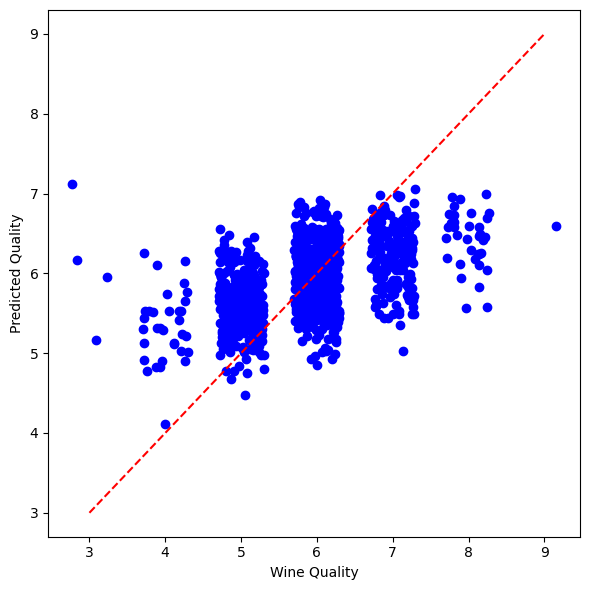

In [142]:

param_grid = {"alpha": [1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1, 10, 100]}
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, verbose=1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("\nBest Parameters for Lasso:")
print(grid_search.best_params_)

visualize_model_result(grid_search,X_test,y_test)


The best regularization seems to be no regularization. Not sure why this doesn't work

# Hyperparameter tuning of best models

Multilayer perceptron and Gaussian SVM perform the best. Can we improve the results with hyperparameter tuning

## Multilayer Perceptron

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..............activation=identity;, score=-0.607 total time=   0.3s
[CV 2/5] END ..............activation=identity;, score=-0.551 total time=   0.3s
[CV 3/5] END ..............activation=identity;, score=-0.593 total time=   0.3s
[CV 4/5] END ..............activation=identity;, score=-0.554 total time=   0.3s
[CV 5/5] END ..............activation=identity;, score=-0.527 total time=   0.4s
[CV 1/5] END ..............activation=logistic;, score=-0.518 total time=  10.8s
[CV 2/5] END ..............activation=logistic;, score=-0.551 total time=   1.5s
[CV 3/5] END ..............activation=logistic;, score=-0.553 total time=  10.1s
[CV 4/5] END ..............activation=logistic;, score=-0.478 total time=   7.3s
[CV 5/5] END ..............activation=logistic;, score=-0.529 total time=   0.7s
[CV 1/5] END ..................activation=tanh;, score=-0.526 total time=   6.2s
[CV 2/5] END ..................activation=tanh;, 

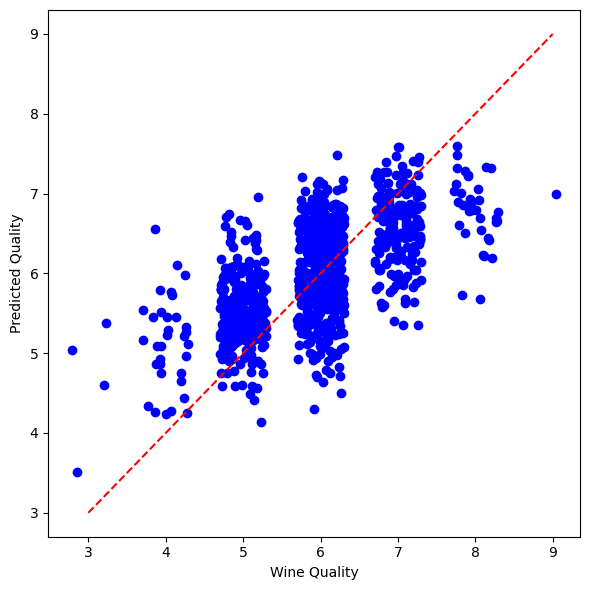

In [143]:
#  Hyperparameter Tuning (Activation function)
param_grid = {"activation": ['identity', 'logistic', 'tanh', 'relu']}
MLP_model = MLPRegressor(max_iter=1000, random_state=42)
grid_search = GridSearchCV(MLP_model, param_grid, cv=5, verbose=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("\nBest Parameters for MLP:")
print(grid_search.best_params_)

visualize_model_result(grid_search,X_test,y_test)


The default (ReLu) is good lets try different network sizes

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...........................hidden_layer_sizes=(10,); total time=   2.4s
[CV] END ...........................hidden_layer_sizes=(10,); total time=   2.4s
[CV] END ...........................hidden_layer_sizes=(10,); total time=   2.3s
[CV] END ...........................hidden_layer_sizes=(10,); total time=   2.2s
[CV] END ...........................hidden_layer_sizes=(10,); total time=   2.5s
[CV] END ...........................hidden_layer_sizes=(50,); total time=   3.7s
[CV] END ...........................hidden_layer_sizes=(50,); total time=   4.5s
[CV] END ...........................hidden_layer_sizes=(50,); total time=   4.0s
[CV] END ...........................hidden_layer_sizes=(50,); total time=   4.1s
[CV] END ...........................hidden_layer_sizes=(50,); total time=   3.6s
[CV] END ........................hidden_layer_sizes=(50, 25); total time=   4.1s
[CV] END ........................hidden_layer_siz

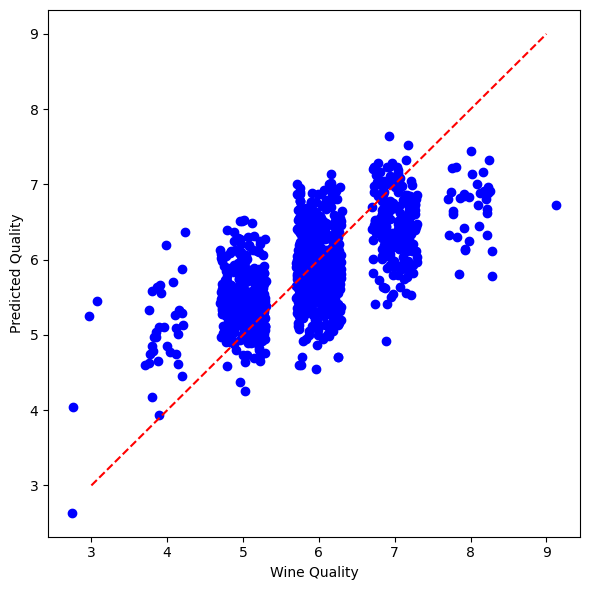

In [144]:
# Try smaller networks 2 and 3 layer networks
param_grid = {
    'hidden_layer_sizes': [
        (10,), (50,),
        (50, 25),
        (100, 50, 25)
    ]
}

MLP_model = MLPRegressor(max_iter=1000, random_state=42)
grid_search = GridSearchCV(MLP_model, param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("\nBest Parameters for MLP:")
print(grid_search.best_params_)

visualize_model_result(grid_search,X_test,y_test)

No improvements over the default here. Let's try a larger network

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..........................hidden_layer_sizes=(100,); total time=   3.6s
[CV] END ..........................hidden_layer_sizes=(100,); total time=   3.8s
[CV] END ..........................hidden_layer_sizes=(100,); total time=   5.3s
[CV] END ..........................hidden_layer_sizes=(100,); total time=   4.7s
[CV] END ..........................hidden_layer_sizes=(100,); total time=   4.0s
[CV] END ..........................hidden_layer_sizes=(200,); total time=   6.1s
[CV] END ..........................hidden_layer_sizes=(200,); total time=   5.7s
[CV] END ..........................hidden_layer_sizes=(200,); total time=   6.2s
[CV] END ..........................hidden_layer_sizes=(200,); total time=   6.0s
[CV] END ..........................hidden_layer_sizes=(200,); total time=   5.8s
[CV] END .......................hidden_layer_sizes=(100, 50); total time=   7.3s
[CV] END .......................hidden_layer_size

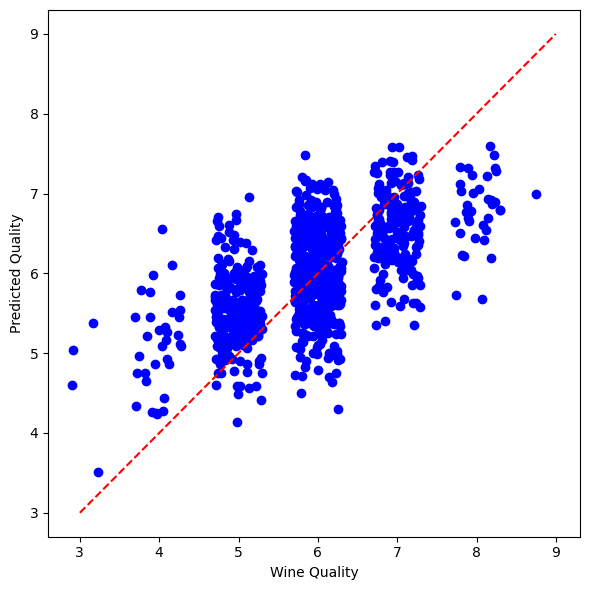

In [145]:
# Try larger networks 2 and 3 layer networks
param_grid = {
    'hidden_layer_sizes': [
        (100,), (200,),
        (100, 50),
        (50, 50, 50)
    ]
}

MLP_model = MLPRegressor(max_iter=1000, random_state=42)
grid_search = GridSearchCV(MLP_model, param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("\nBest Parameters for MLP:")
print(grid_search.best_params_)

visualize_model_result(grid_search,X_test,y_test)

Default size of 100 remains the best here though maybe underperforms compared to 50

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...........................hidden_layer_sizes=(50,); total time=   3.2s
[CV] END ...........................hidden_layer_sizes=(50,); total time=   3.9s
[CV] END ...........................hidden_layer_sizes=(50,); total time=   3.5s
[CV] END ...........................hidden_layer_sizes=(50,); total time=   3.6s
[CV] END ...........................hidden_layer_sizes=(50,); total time=   3.0s
[CV] END ...........................hidden_layer_sizes=(75,); total time=   3.2s
[CV] END ...........................hidden_layer_sizes=(75,); total time=   3.2s
[CV] END ...........................hidden_layer_sizes=(75,); total time=   3.3s
[CV] END ...........................hidden_layer_sizes=(75,); total time=   3.5s
[CV] END ...........................hidden_layer_sizes=(75,); total time=   3.9s
[CV] END ..........................hidden_layer_sizes=(100,); total time=   3.6s
[CV] END ..........................hidden_layer_s

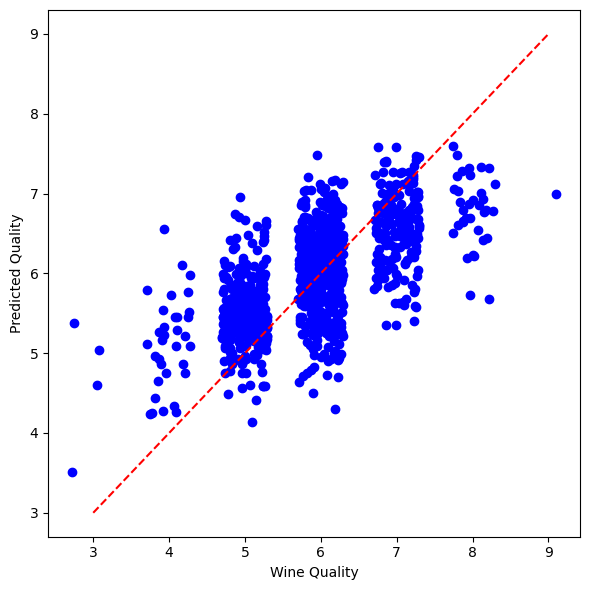

In [146]:
# Small variations
param_grid = {
    'hidden_layer_sizes': [
        (50,), (75,),
        (100,),
        (150,)
    ]
}

MLP_model = MLPRegressor(max_iter=1000, random_state=42)
grid_search = GridSearchCV(MLP_model, param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("\nBest Parameters for MLP:")
print(grid_search.best_params_)

visualize_model_result(grid_search,X_test,y_test)

## Gaussian SVM

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .............................................C=0.01; total time=   1.6s
[CV] END .............................................C=0.01; total time=   1.6s
[CV] END .............................................C=0.01; total time=   1.6s
[CV] END .............................................C=0.01; total time=   1.6s
[CV] END .............................................C=0.01; total time=   1.5s
[CV] END ..............................................C=0.1; total time=   1.6s
[CV] END ..............................................C=0.1; total time=   1.6s
[CV] END ..............................................C=0.1; total time=   1.5s
[CV] END ..............................................C=0.1; total time=   1.6s
[CV] END ..............................................C=0.1; total time=   1.6s
[CV] END ................................................C=1; total time=   1.6s
[CV] END ........................................

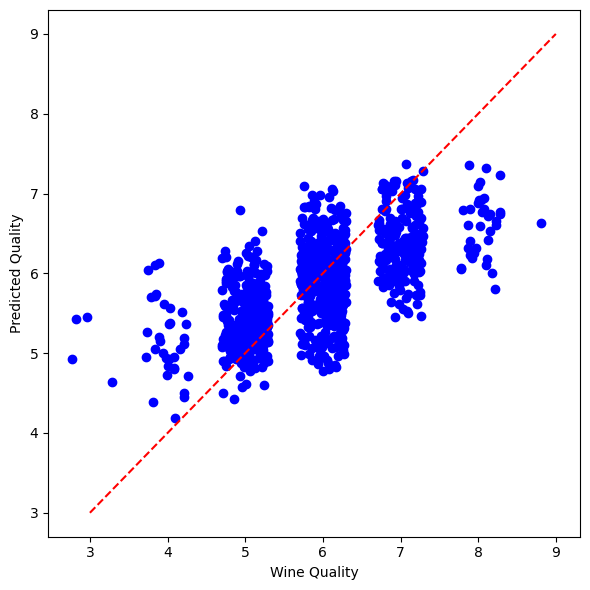

In [147]:
# Can we get better performance with more regularization?
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}
SVM_model = SVR(kernel='rbf')

grid_search = GridSearchCV(SVM_model, param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("\nBest Parameters for SVR:")
print(grid_search.best_params_)

visualize_model_result(grid_search,X_test,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .......................................epsilon=0.05; total time=   1.7s
[CV] END .......................................epsilon=0.05; total time=   1.7s
[CV] END .......................................epsilon=0.05; total time=   1.7s
[CV] END .......................................epsilon=0.05; total time=   1.7s
[CV] END .......................................epsilon=0.05; total time=   1.7s
[CV] END ........................................epsilon=0.1; total time=   1.7s
[CV] END ........................................epsilon=0.1; total time=   1.8s
[CV] END ........................................epsilon=0.1; total time=   1.8s
[CV] END ........................................epsilon=0.1; total time=   1.8s
[CV] END ........................................epsilon=0.1; total time=   1.8s
[CV] END .......................................epsilon=0.25; total time=   1.4s
[CV] END .......................................e

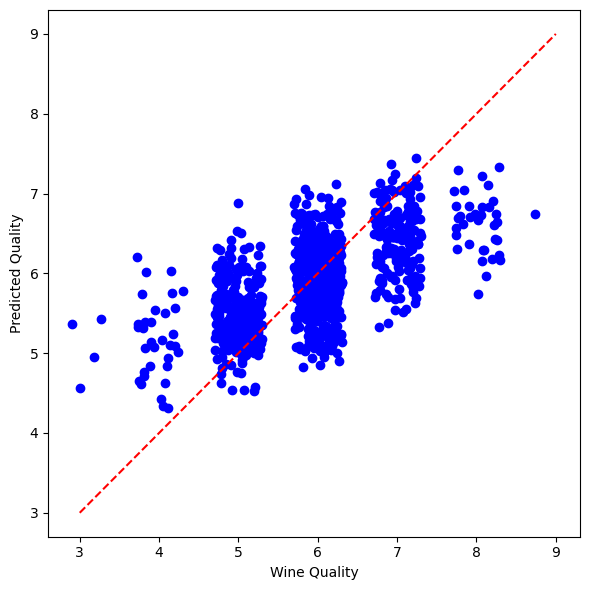

In [148]:
# What if we change epsilon
param_grid = {
    'epsilon': [0.05, 0.1, 0.25, 0.5, 1, 2]
}
SVM_model = SVR(kernel='rbf')

grid_search = GridSearchCV(SVM_model, param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("\nBest Parameters for SVR:")
print(grid_search.best_params_)

visualize_model_result(grid_search,X_test,y_test)

# Weighing samples to try and increase performance
The model is bad at predicting really good and really bad wines. Can we improve that by weighting the higher and lower scores heavier?

In [149]:
# Calculate sample weights with 6 being the central value
scaling_fac = 4
sample_weights = 1 + abs(y_train - 6) ** scaling_fac

# Duplicate samples according to their weights
X_train_repeated = np.repeat(X_train, np.ceil(sample_weights).astype(int), axis=0)
y_train_repeated = np.repeat(y_train, np.ceil(sample_weights).astype(int))
unique_y, count_y = np.unique(y_train_repeated, return_counts=True)

print(unique_y)
print(count_y)

unique_y, count_y = np.unique(y_train, return_counts=True)

print(count_y)



[3 4 5 6 7 8 9]
[1312 2210 2332 1756 1408 2380  328]
[  16  130 1166 1756  704  140    4]


In [150]:

# Fit model
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)


MLPRegressor(max_iter=1000, random_state=42)

In [151]:

# Fit weighted model
mlp_weighted = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_weighted.fit(X_train_repeated, y_train_repeated)


MLPRegressor(max_iter=1000, random_state=42)

MLP R Squared:
0.3884078261236137
MLP weighted R Squared:
0.012695715147514441


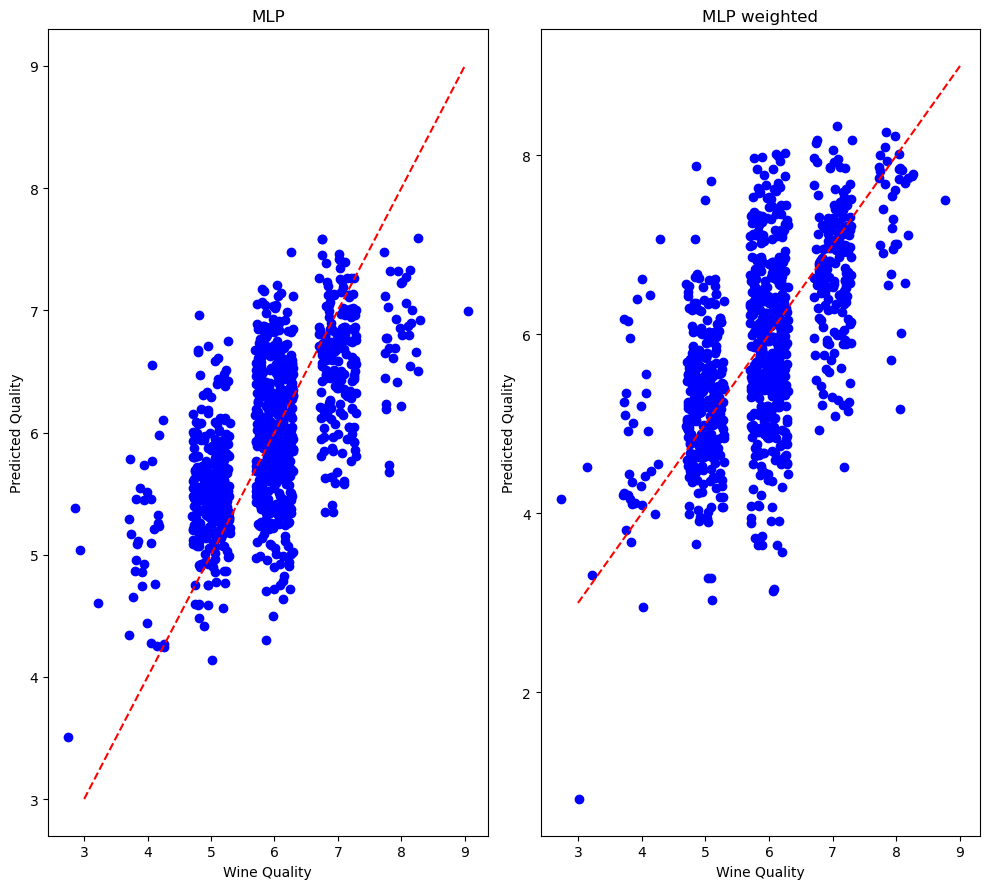

MLP R Squared:
0.5266815290217707
MLP weighted R Squared:
0.3733340662015666


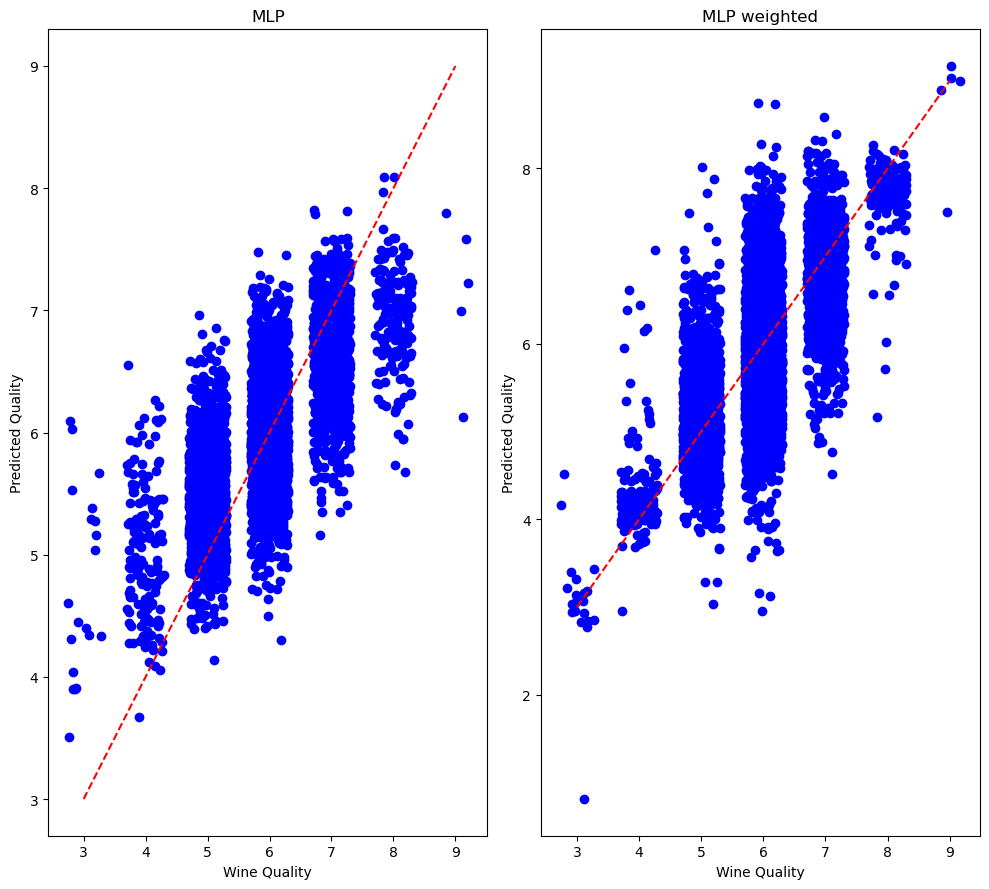

In [152]:
# show results
models = {"MLP":mlp,
          "MLP weighted":mlp_weighted}
visualize_model_result(models,X_test,y_test)
visualize_model_result(models,X_processed,y)

Clearly predictions on extreme values are much better, but overal performance is worse since medium values are less well captures. Test dataset result seem to have a really bad score. But still might be better if you want to have better prediction for qualities of 3-4 and 8-9. Really extreme values are just not very well represented in the test set.

We might be overfitting for the 3s and 9s though...

Try the same but for SVM

MLP R Squared:
0.3884078261236137
MLP weighted R Squared:
0.012695715147514441
Suport Vector Regressor R Squared:
0.4173981493912158
SVR weighted R Squared:
-0.1677796419052584


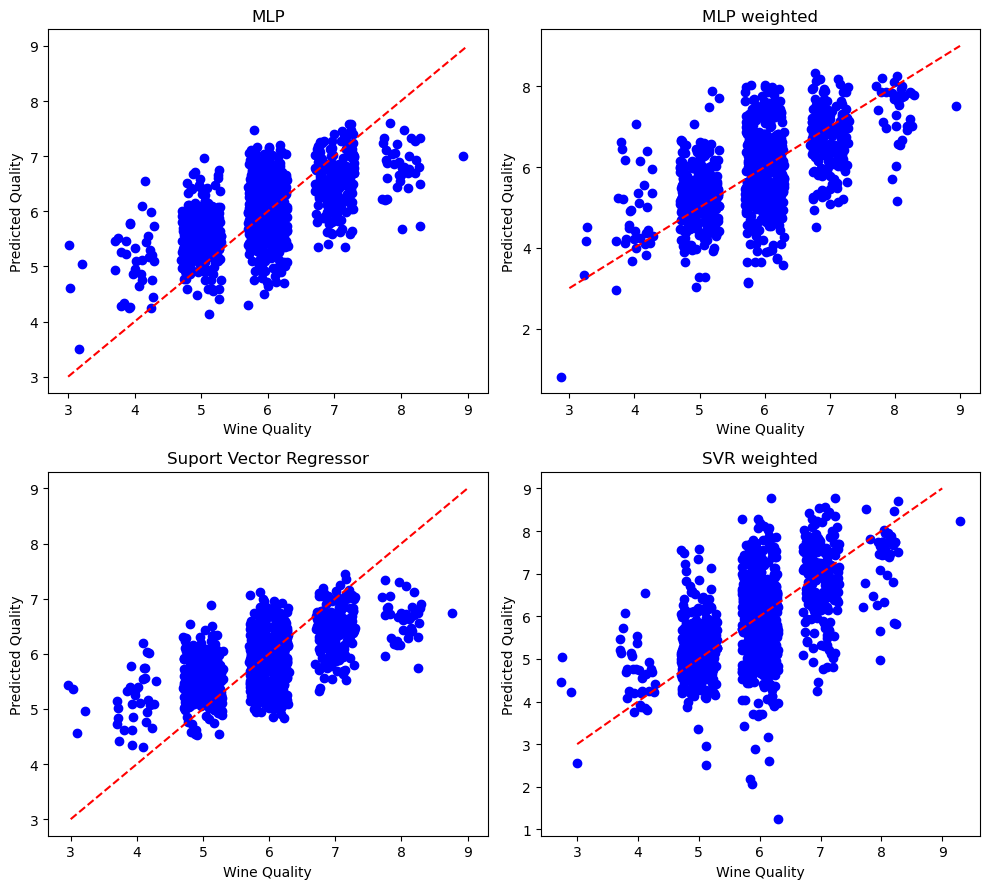

In [153]:
# Fit model
SVR_rbf = SVR(kernel='rbf', epsilon=0.25)
SVR_rbf.fit(X_train, y_train)

SVR_rbf_weighted = SVR(kernel='rbf', epsilon=0.25)
SVR_rbf_weighted.fit(X_train_repeated, y_train_repeated)

models["Suport Vector Regressor"] = SVR_rbf
models["SVR weighted"] = SVR_rbf_weighted

visualize_model_result(models,X_test,y_test)

MLP R Squared:
0.5266815290217707
MLP weighted R Squared:
0.3733340662015666
Suport Vector Regressor R Squared:
0.4875604455346808
SVR weighted R Squared:
0.09666703629757756


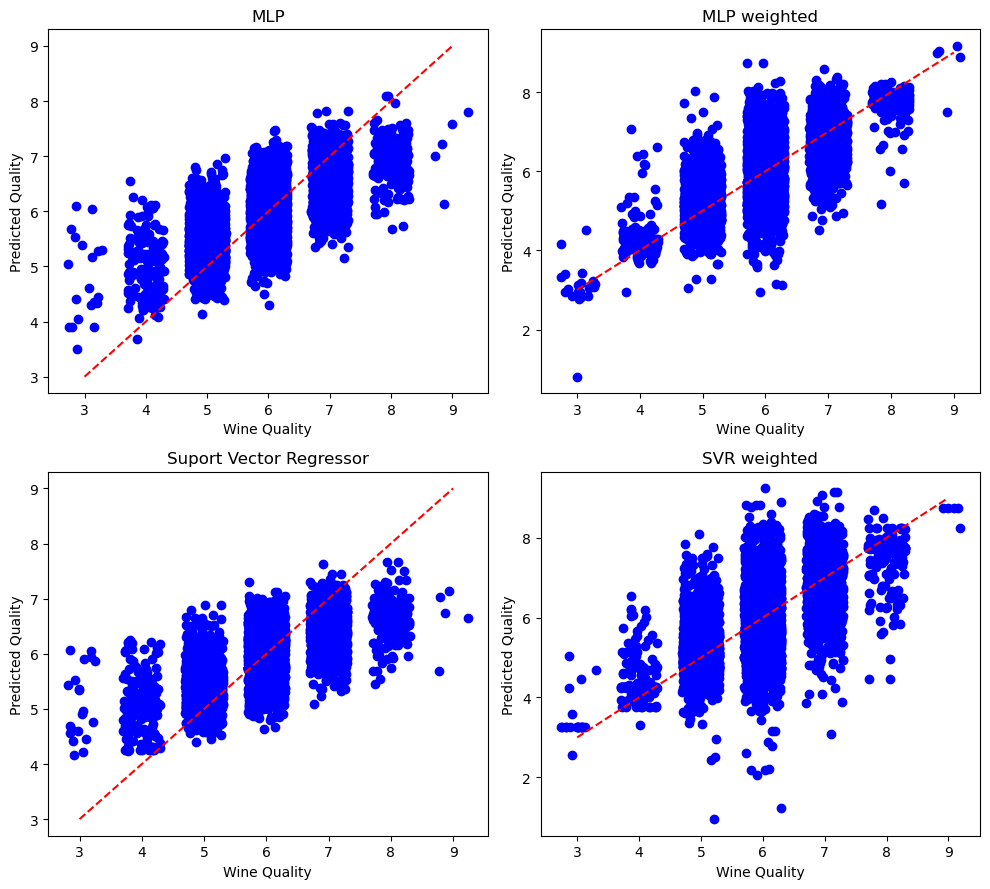

In [154]:
visualize_model_result(models,X_processed,y)

# Gradient boosting and XGBoost

MLP R Squared:
0.3884078261236137
MLP weighted R Squared:
0.012695715147514441
Suport Vector Regressor R Squared:
0.4173981493912158
SVR weighted R Squared:
-0.1677796419052584
Gradient Boosting Regressor R Squared:
0.5395493631977532


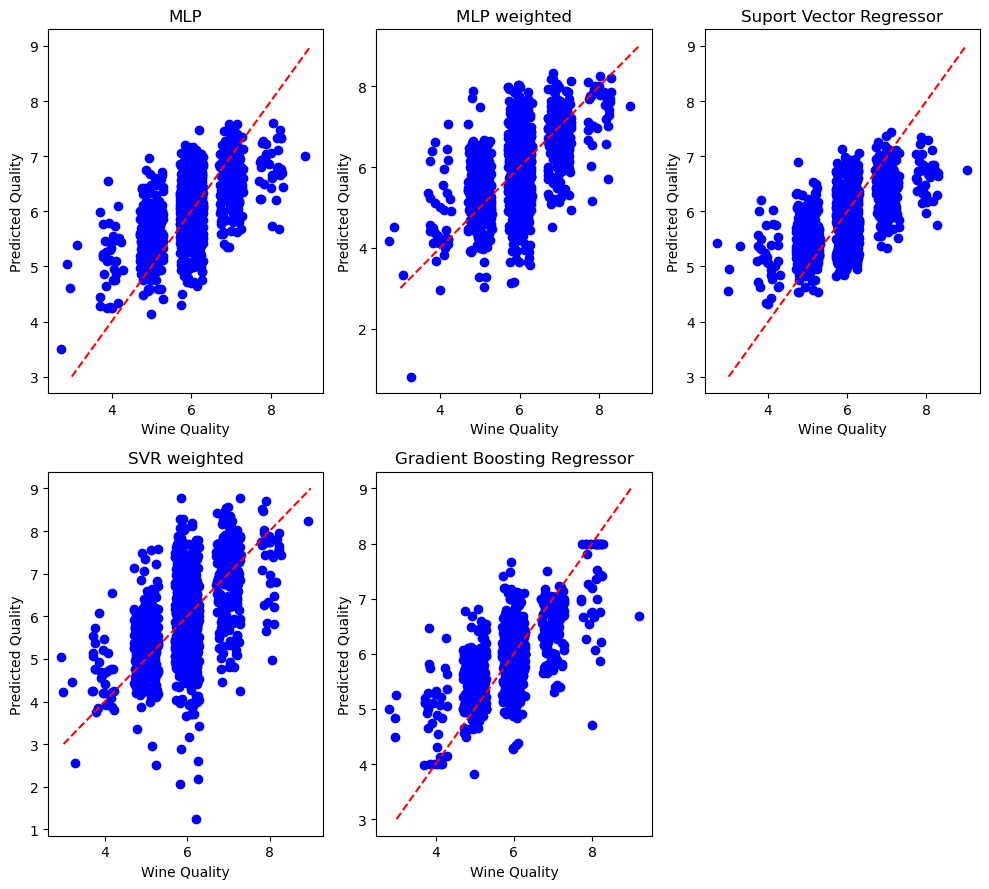

In [155]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boost = GradientBoostingRegressor(n_estimators=2000,max_depth=7)

gradient_boost.fit(X_train, y_train)

models["Gradient Boosting Regressor"] = gradient_boost

visualize_model_result(models,X_test,y_test)


Gradient boost is best so far. Can we tune the parameters

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ......................max_depth=3;, score=-0.527 total time=   1.6s
[CV 2/2] END ......................max_depth=3;, score=-0.475 total time=   1.6s
[CV 1/2] END ......................max_depth=5;, score=-0.505 total time=   2.6s
[CV 2/2] END ......................max_depth=5;, score=-0.454 total time=   2.5s
[CV 1/2] END ......................max_depth=7;, score=-0.492 total time=   3.6s
[CV 2/2] END ......................max_depth=7;, score=-0.446 total time=   3.6s
[CV 1/2] END ......................max_depth=9;, score=-0.503 total time=   4.6s
[CV 2/2] END ......................max_depth=9;, score=-0.450 total time=   4.6s

Best Parameters for MLP:
{'max_depth': 7}
 R Squared:
0.5460440987542574


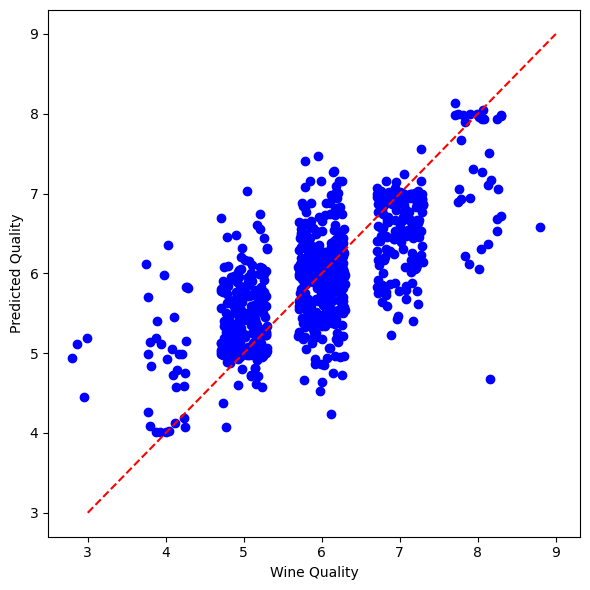

In [156]:
param_grid = {"max_depth": [3,5,7,9]}
GBR_model = GradientBoostingRegressor(n_estimators=500)
grid_search = GridSearchCV(GBR_model, param_grid, cv=2, verbose=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("\nBest Parameters for MLP:")
print(grid_search.best_params_)

visualize_model_result(grid_search,X_test,y_test)

## XGBoost

 R Squared:
0.5074072480201721


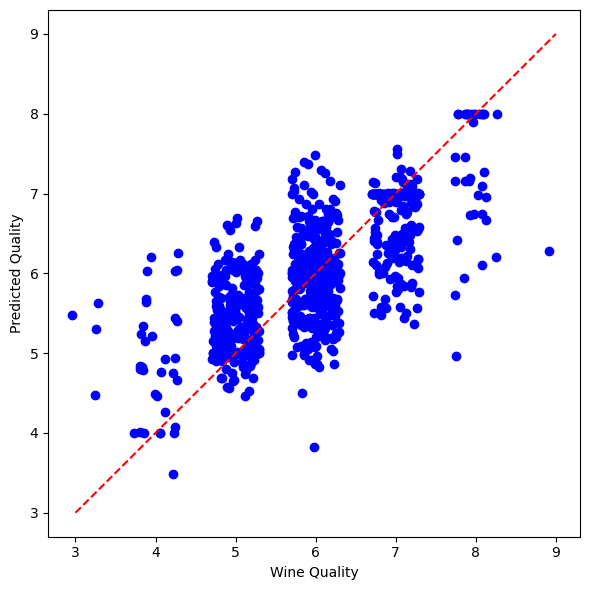

In [157]:
from xgboost import XGBRegressor

# Define the XGBoost regressor model
xgb_reg = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=50000,
    max_depth=7
)
xgb_reg.fit(X_train,y_train)
models["XGBoost"] = xgb_reg

visualize_model_result(xgb_reg,X_test,y_test)

MLP R Squared:
0.3884078261236137
MLP weighted R Squared:
0.012695715147514441
Suport Vector Regressor R Squared:
0.4173981493912158
SVR weighted R Squared:
-0.1677796419052584
Gradient Boosting Regressor R Squared:
0.5395493631977532
XGBoost R Squared:
0.5074072480201721


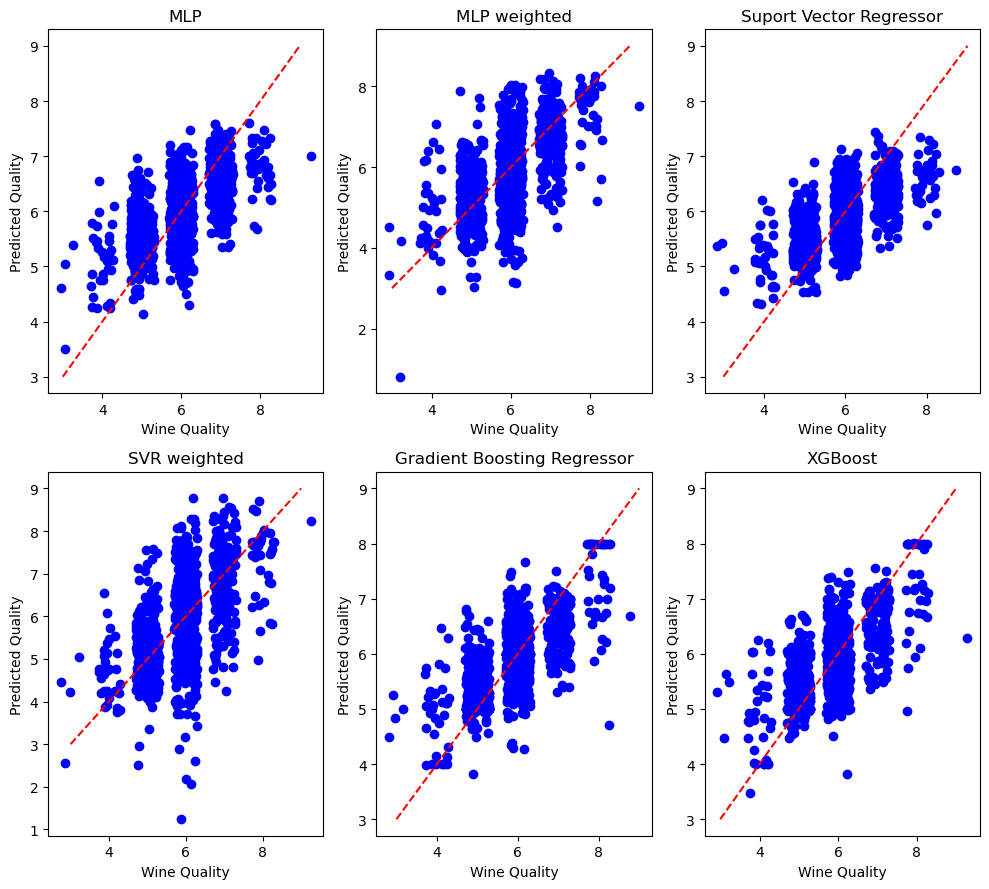

MLP R Squared:
0.5266815290217707
MLP weighted R Squared:
0.3733340662015666
Suport Vector Regressor R Squared:
0.4875604455346808
SVR weighted R Squared:
0.09666703629757756
Gradient Boosting Regressor R Squared:
0.907777750877122
XGBoost R Squared:
0.9013367891311646


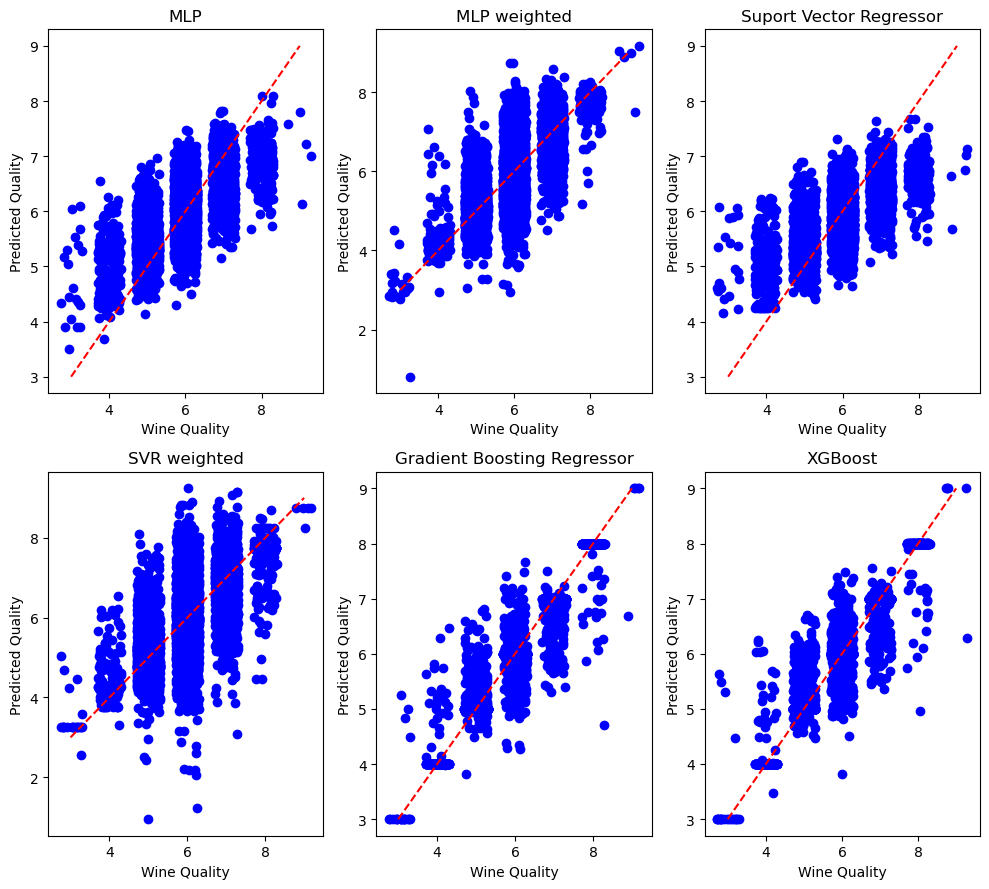

In [158]:


visualize_model_result(models,X_test,y_test)
visualize_model_result(models,X_processed,y)

# Combine model predictions based on their R squared score

In [159]:
def combine_model_predictions(models,X_test,y_test,r2_weight=True):
    
    all_result = {}
    sum_r2 = 0
    weighted_preds = np.zeros_like(y_test)
    # all predictions
    for name,model in models.items():
        # Get model results and store them
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test,y_pred)
        all_result[name] = {"y_pred":y_pred,"r2":r2}

        # define weights and add
        if r2_weight:
            r2_weight = max([0,r2]) # negative R2s don't contribute
        else:
            r2_weight = 1
        adj_preds = y_pred * r2_weight
        weighted_preds = weighted_preds + adj_preds
        sum_r2 += r2_weight

    weighted_preds = weighted_preds / sum_r2
    print("Combined R squared:")
    print(r2_score(y_test,weighted_preds))

    # Display Results
    plt.figure(figsize=(10, 9))
    n_cols = np.ceil(np.sqrt(len(models)+1)).astype(int)
    n_rows = np.round(np.sqrt(len(models)+1)).astype(int)

    plt.subplot(n_rows,n_cols,1)
    plt.scatter(y_test+np.random.uniform(-0.3, 0.3, size=np.size(y_test)), weighted_preds, color='blue', label='Predictions')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Unity line')
    plt.xlabel("Wine Quality")
    plt.ylabel("Predicted Quality")
    plt.title("Combined models")

    for i, (name, result) in enumerate(all_result.items(),start=2):
        y_pred = result["y_pred"]
        print(f"{name} R Squared:")
        print(result["r2"])

        # Scatter plot
        plt.subplot(n_rows,n_cols,i)
        plt.scatter(y_test+np.random.uniform(-0.3, 0.3, size=np.size(y_test)), y_pred, color='blue', label='Predictions')
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Unity line')
        plt.xlabel("Wine Quality")
        plt.ylabel("Predicted Quality")
        plt.title(name)
    
    plt.tight_layout()
    plt.show()


    return weighted_preds, all_result


Combined R squared:
0.5584511402319777
MLP R Squared:
0.3884078261236137
MLP weighted R Squared:
0.012695715147514441
Suport Vector Regressor R Squared:
0.4173981493912158
SVR weighted R Squared:
-0.1677796419052584
Gradient Boosting Regressor R Squared:
0.5395493631977532
XGBoost R Squared:
0.5074072480201721


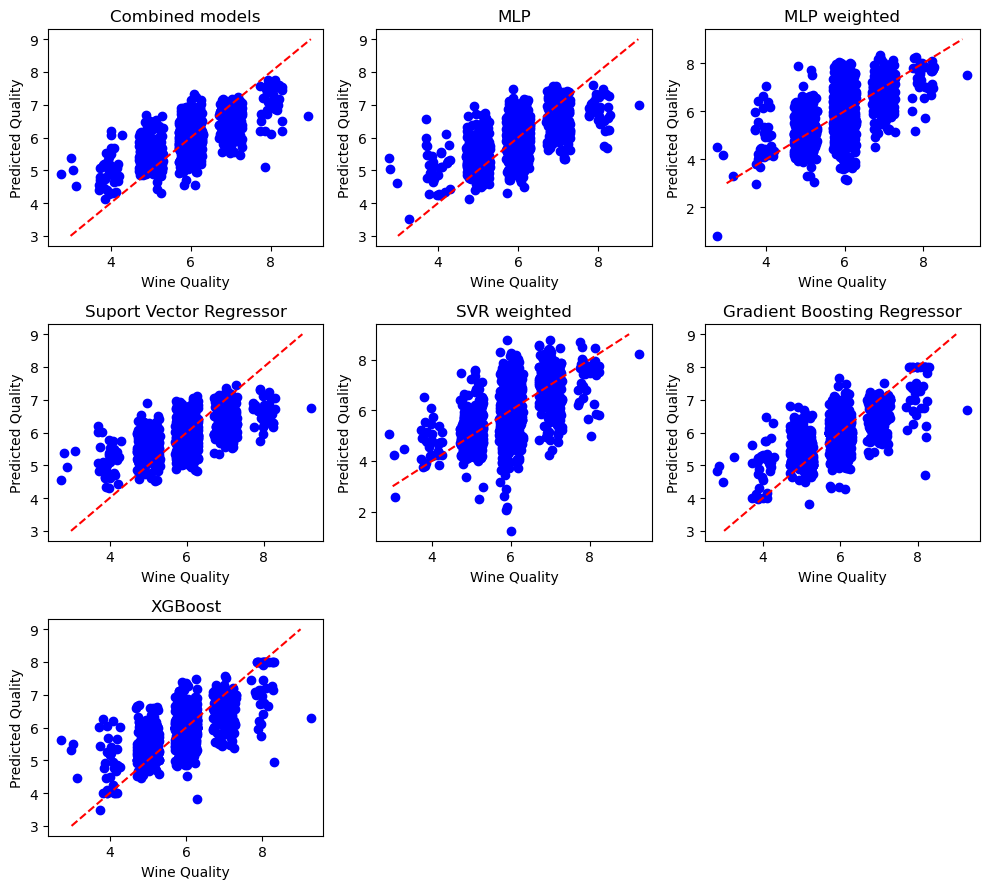

In [160]:
w_preds, m_results = combine_model_predictions(models,X_test,y_test)

# Stack models and try to make a better prediction using XGBoost

In [161]:
def meta_model(models, X_train, y_train, X_test, y_test):
    # Get new train split for meta model
    
    X_meta_train, X_meta_test, y_meta_train, y_meta_test = train_test_split(X_train, y_train, stratify=y_train,test_size=0.2, random_state=89)

    # Loop over all models and fit
    all_base_models = {}
    meta_features = None
    for name, model in models.items():
        print(f"Fitting {name}")
        curr_base_model = model.fit(X_meta_train,y_meta_train)
        all_base_models[name] = curr_base_model
        curr_base_preds = curr_base_model.predict(X_meta_test)
        if meta_features is None:
            meta_features = curr_base_preds  # Initialize the matrix with the first row
        else:
            meta_features = np.vstack([meta_features, curr_base_preds])  # Append the row to the matrix

    meta_features = meta_features.transpose()

    # XGBoost as meta model
    meta_model = XGBRegressor(
        objective="reg:squarederror",
        n_estimators=50000,
        max_depth=7
        )
    print("Fitting meta model")
    meta_model.fit(meta_features, y_meta_test)

    meta_test_features = None
    for name, model in all_base_models.items():
        curr_test_preds = model.predict(X_test)
        if meta_test_features is None:
            meta_test_features = curr_test_preds  # Initialize the matrix with the first row
        else:
            meta_test_features = np.vstack([meta_test_features, curr_test_preds])  # Append the row to the matrix

    meta_test_features = meta_test_features.transpose()

    final_predictions = meta_model.predict(meta_test_features)

    meta_r2 = r2_score(y_test,final_predictions)

    print("Meta R Squared:")
    print(meta_r2)

    # Display Results
    plt.figure(figsize=(10, 9))
    n_cols = np.ceil(np.sqrt(len(models)+1)).astype(int)
    n_rows = np.round(np.sqrt(len(models)+1)).astype(int)

    plt.subplot(n_rows,n_cols,1)
    plt.scatter(y_test+np.random.uniform(-0.3, 0.3, size=np.size(y_test)), final_predictions, color='blue', label='Predictions')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Unity line')
    plt.xlabel("Wine Quality")
    plt.ylabel("Predicted Quality")
    plt.title("Meta XGBoost")

    for i, (name, model) in enumerate(models.items(),start=2):
        y_pred = model.predict(X_test)
        print(f"{name} R Squared:")
        print(r2_score(y_test,y_pred))

        # Scatter plot
        plt.subplot(n_rows,n_cols,i)
        plt.scatter(y_test+np.random.uniform(-0.3, 0.3, size=np.size(y_test)), y_pred, color='blue', label='Predictions')
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Unity line')
        plt.xlabel("Wine Quality")
        plt.ylabel("Predicted Quality")
        plt.title(name)
    
    plt.tight_layout()
    plt.show()


    return final_predictions, meta_model

    





Fitting MLP
Fitting MLP weighted
Fitting Suport Vector Regressor
Fitting SVR weighted
Fitting Gradient Boosting Regressor
Fitting XGBoost
Fitting meta model
Meta R Squared:
0.4184739589691162
MLP R Squared:
0.4023686865480546
MLP weighted R Squared:
0.4023686865480546
Suport Vector Regressor R Squared:
0.41003465575672515
SVR weighted R Squared:
0.41003465575672515
Gradient Boosting Regressor R Squared:
0.49381836477076535
XGBoost R Squared:
0.44617003202438354


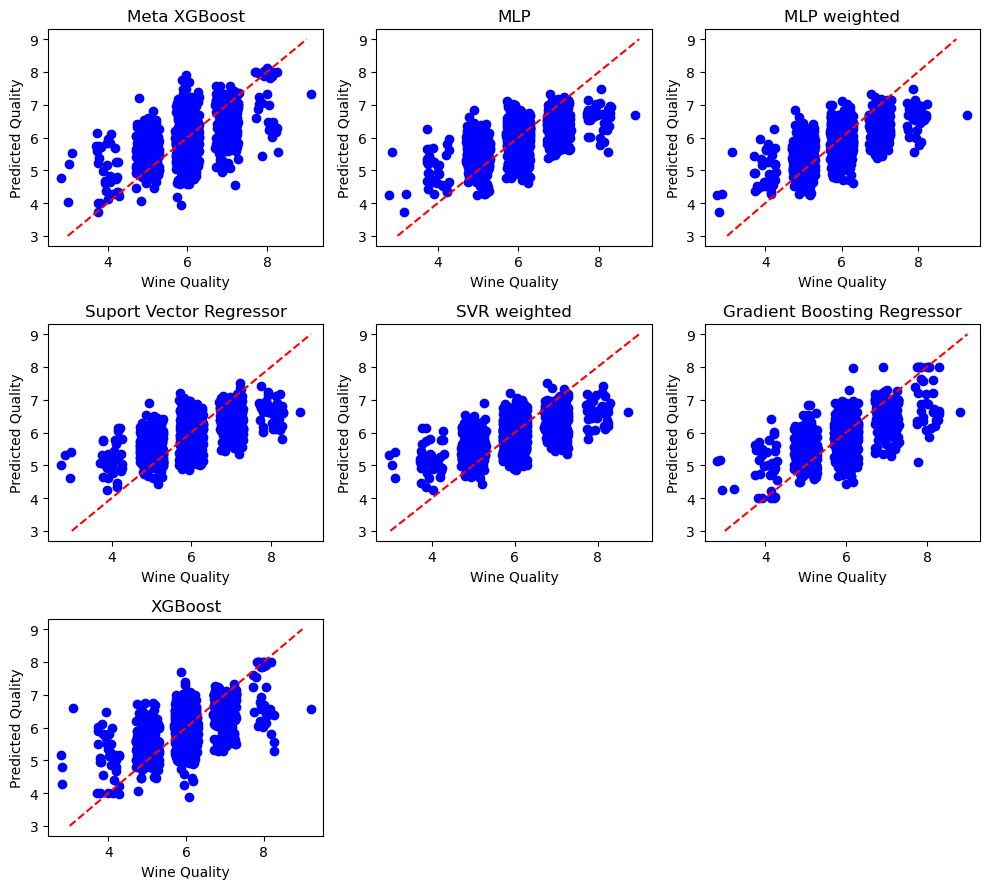

In [162]:
# Run meta model

final_predictions, meta_model = meta_model(models, X_train, y_train, X_test, y_test)
    
    

# Reduce regression back down to categories for comparison

              precision    recall  f1-score   support

       False       0.89      0.19      0.32       212
        True       0.82      0.99      0.90       767

    accuracy                           0.82       979
   macro avg       0.85      0.59      0.61       979
weighted avg       0.83      0.82      0.77       979



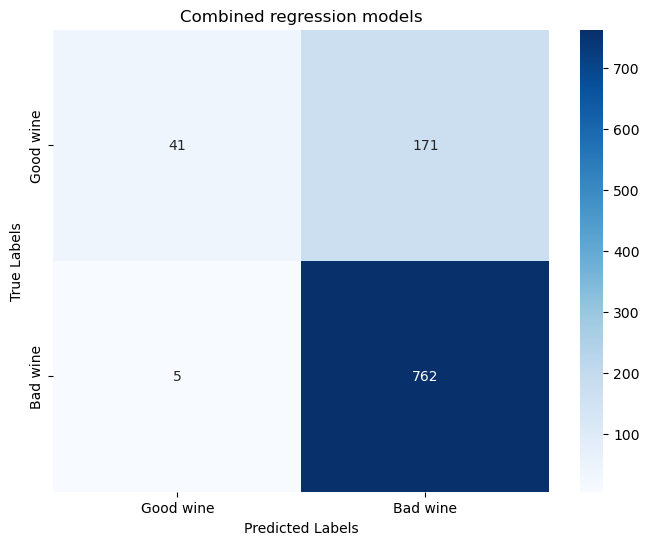

In [163]:
# combined models
from sklearn.metrics import confusion_matrix, classification_report

y_test_cat = y_test < 7
y_pred_cat = w_preds < 7

print(classification_report(y_test_cat, y_pred_cat))

# Compute confusion matrix
cm = confusion_matrix(y_test_cat, y_pred_cat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Good wine', 'Bad wine'], yticklabels=['Good wine', 'Bad wine'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined regression models')
plt.show()

In [164]:
print(models)

{'MLP': MLPRegressor(max_iter=1000, random_state=42), 'MLP weighted': MLPRegressor(max_iter=1000, random_state=42), 'Suport Vector Regressor': SVR(epsilon=0.25), 'SVR weighted': SVR(epsilon=0.25), 'Gradient Boosting Regressor': GradientBoostingRegressor(max_depth=7, n_estimators=2000), 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50000, n_jobs=None,
             num_p

              precision    recall  f1-score   support

       False       0.95      0.17      0.29       212
        True       0.81      1.00      0.90       767

    accuracy                           0.82       979
   macro avg       0.88      0.59      0.60       979
weighted avg       0.84      0.82      0.77       979



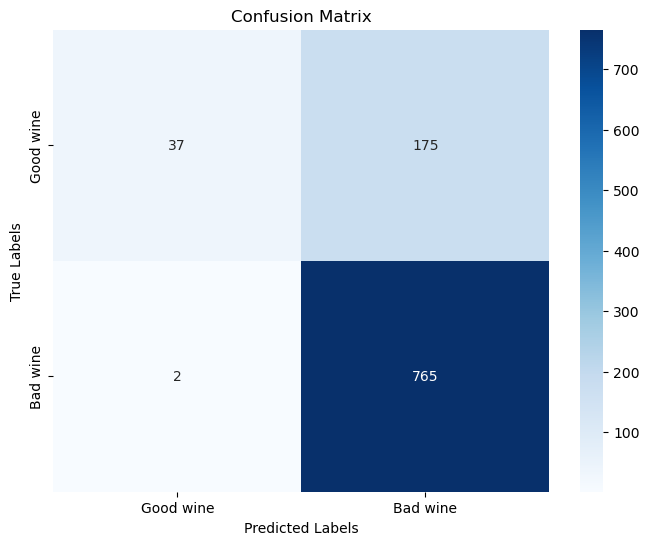

In [165]:
# Gradient boost


y_test_cat = y_test < 7
y_pred_cat = models["Gradient Boosting Regressor"].predict(X_test) < 7

print(classification_report(y_test_cat, y_pred_cat))

# Compute confusion matrix
cm = confusion_matrix(y_test_cat, y_pred_cat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Good wine', 'Bad wine'], yticklabels=['Good wine', 'Bad wine'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()